In [1]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, Dense

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import logging
logging.getLogger('tensorflow').disabled = True

In [6]:
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from keras import preprocessing
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Flatten, Dense, Embedding, LSTM,  Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dropout
from keras.models import load_model
from keras.optimizers import RMSprop
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from google.colab import files
import re, os

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [23]:
num_words = 10000
maxlen = 150

In [24]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=num_words)
train_data = pad_sequences(train_data, maxlen=maxlen)
test_data = pad_sequences(test_data, maxlen=maxlen)

In [25]:
# Combine train and test data for further processing
texts = np.concatenate((train_data, test_data), axis=0)
labels = np.concatenate((train_labels, test_labels), axis=0)

In [26]:
# Restrict training samples to 100
train_data = train_data[:100]
train_labels = train_labels[:100]

In [27]:
# Consider only the top 10,000 words
train_data = train_data[:, :num_words]
test_data = test_data[:, :num_words]

In [28]:
# Model with Embedding layer
model_embedding = Sequential()
model_embedding.add(Embedding(num_words, 32, input_length=maxlen))
model_embedding.add(SimpleRNN(32))
model_embedding.add(Dense(1, activation='sigmoid'))


In [41]:
model = Sequential()
model.add(Embedding(10000, 8, input_length=maxlen))
model.add(Flatten())
model.add(Dense(1, activation = 'sigmoid'))
model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 150, 8)            80000     
                                                                 
 flatten_1 (Flatten)         (None, 1200)              0         
                                                                 
 dense_2 (Dense)             (None, 1)                 1201      
                                                                 
Total params: 81201 (317.19 KB)
Trainable params: 81201 (317.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [42]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 150, 8)            80000     
                                                                 
 flatten_1 (Flatten)         (None, 1200)              0         
                                                                 
 dense_2 (Dense)             (None, 1)                 1201      
                                                                 
Total params: 81201 (317.19 KB)
Trainable params: 81201 (317.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [43]:
callbacks = ModelCheckpoint(
    filepath="model1.h5",
    save_best_only=True,
    monitor="val_loss"
)

In [44]:
Model_1 = model.fit(train_data, train_labels,
                    epochs=30,
                    batch_size=32,
                    validation_data=(val_texts, val_labels),
                    callbacks=[callbacks])

Epoch 1/30
4/4 [==============================] - 1s 236ms/step - loss: 0.6956 - accuracy: 0.4500 - val_loss: 0.6936 - val_accuracy: 0.4949
Epoch 2/30
1/4 [======>.......................] - ETA: 0s - loss: 0.6774 - accuracy: 0.8125

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


4/4 [==============================] - 1s 227ms/step - loss: 0.6730 - accuracy: 0.8300 - val_loss: 0.6936 - val_accuracy: 0.4964
Epoch 3/30
4/4 [==============================] - 1s 439ms/step - loss: 0.6576 - accuracy: 0.9400 - val_loss: 0.6936 - val_accuracy: 0.4954
Epoch 4/30
4/4 [==============================] - 1s 443ms/step - loss: 0.6442 - accuracy: 0.9600 - val_loss: 0.6933 - val_accuracy: 0.5001
Epoch 5/30
4/4 [==============================] - 1s 205ms/step - loss: 0.6310 - accuracy: 0.9800 - val_loss: 0.6935 - val_accuracy: 0.4991
Epoch 6/30
4/4 [==============================] - 1s 218ms/step - loss: 0.6183 - accuracy: 0.9800 - val_loss: 0.6936 - val_accuracy: 0.5002
Epoch 7/30
4/4 [==============================] - 1s 224ms/step - loss: 0.6047 - accuracy: 0.9900 - val_loss: 0.6932 - val_accuracy: 0.5065
Epoch 8/30
4/4 [==============================] - 1s 219ms/step - loss: 0.5910 - accuracy: 1.0000 - val_loss: 0.6932 - val_accuracy: 0.5047
Epoch 9/30
4/4 [===============

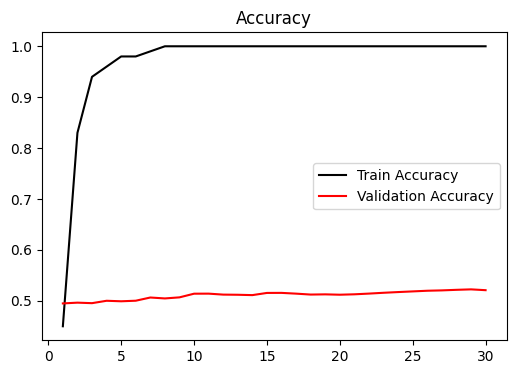

<Figure size 640x480 with 0 Axes>

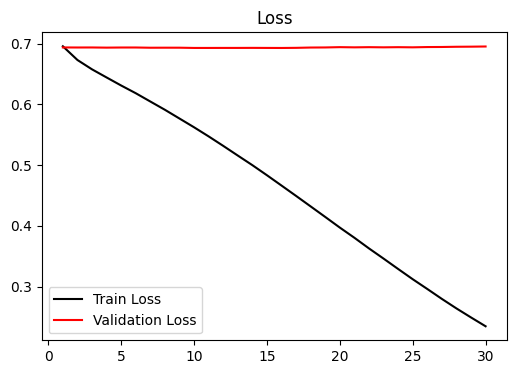

In [52]:
accuracy = Model_1.history['accuracy']
val_accuracy = Model_1.history['val_accuracy']

loss = Model_1.history["loss"]
val_loss = Model_1.history["val_loss"]

epochs = range(1, len(accuracy) + 1)

plt.figure(figsize=(6,4))
plt.plot(epochs, accuracy, color="black", linestyle="solid", label="Train Accuracy")
plt.plot(epochs, val_accuracy, color="red",linestyle="solid", label="Validation Accuracy")
plt.title("Accuracy")
plt.legend()
plt.figure()

plt.figure(figsize=(6,4))
plt.plot(epochs, loss, color="black", linestyle="solid", label="Train Loss")
plt.plot(epochs, val_loss, color="red", linestyle="solid", label="Validation Loss")
plt.title("Loss")
plt.legend()
plt.show()


In [53]:
train_data_5000 = train_data[:5000]
train_labels_5000 = train_labels[:5000]

In [54]:
model_embedding_5000 = Sequential()
model_embedding_5000.add(Embedding(num_words, 32, input_length=maxlen))
model_embedding_5000.add(Flatten())
model_embedding_5000.add(Dense(1, activation='sigmoid'))

In [55]:
model_embedding_5000.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
model_embedding_5000.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 150, 32)           320000    
                                                                 
 flatten_2 (Flatten)         (None, 4800)              0         
                                                                 
 dense_3 (Dense)             (None, 1)                 4801      
                                                                 
Total params: 324801 (1.24 MB)
Trainable params: 324801 (1.24 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [56]:
callbacks_5000 = ModelCheckpoint(
    filepath="model2.h5",
    save_best_only=True,
    monitor="val_loss"
)

In [59]:
Model_2 = model.fit(train_data, train_labels,
                    epochs=30,
                    batch_size=32,
                    validation_data=(val_texts, val_labels),
                    callbacks=[callbacks])

Epoch 1/30
4/4 [==============================] - 1s 329ms/step - loss: 0.2209 - accuracy: 1.0000 - val_loss: 0.6957 - val_accuracy: 0.5219
Epoch 2/30
4/4 [==============================] - 0s 163ms/step - loss: 0.2077 - accuracy: 1.0000 - val_loss: 0.6961 - val_accuracy: 0.5235
Epoch 3/30
4/4 [==============================] - 1s 219ms/step - loss: 0.1949 - accuracy: 1.0000 - val_loss: 0.6962 - val_accuracy: 0.5237
Epoch 4/30
4/4 [==============================] - 1s 219ms/step - loss: 0.1828 - accuracy: 1.0000 - val_loss: 0.6962 - val_accuracy: 0.5252
Epoch 5/30
4/4 [==============================] - 1s 170ms/step - loss: 0.1715 - accuracy: 1.0000 - val_loss: 0.6969 - val_accuracy: 0.5266
Epoch 6/30
4/4 [==============================] - 1s 220ms/step - loss: 0.1608 - accuracy: 1.0000 - val_loss: 0.6973 - val_accuracy: 0.5269
Epoch 7/30
4/4 [==============================] - 1s 221ms/step - loss: 0.1506 - accuracy: 1.0000 - val_loss: 0.6978 - val_accuracy: 0.5266
Epoch 8/30
4/4 [====

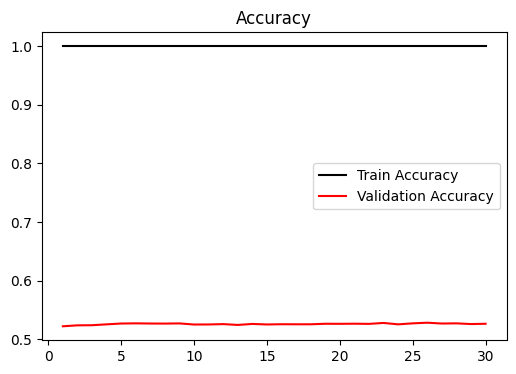

<Figure size 640x480 with 0 Axes>

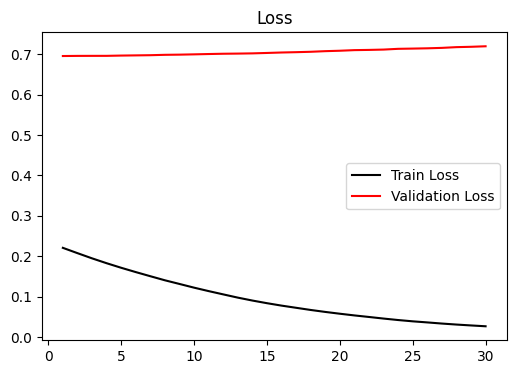

In [61]:
accuracy = Model_2.history['accuracy']
val_accuracy = Model_2.history['val_accuracy']

loss = Model_2.history["loss"]
val_loss = Model_2.history["val_loss"]

epochs = range(1, len(accuracy) + 1)

plt.figure(figsize=(6,4))
plt.plot(epochs, accuracy, color="black", linestyle="solid", label="Train Accuracy")
plt.plot(epochs, val_accuracy, color="red",linestyle="solid", label="Validation Accuracy")
plt.title("Accuracy")
plt.legend()
plt.figure()

plt.figure(figsize=(6,4))
plt.plot(epochs, loss, color="black", linestyle="solid", label="Train Loss")
plt.plot(epochs, val_loss, color="red", linestyle="solid", label="Validation Loss")
plt.title("Loss")
plt.legend()
plt.show()

In [64]:
train_data_10000 = train_data[:10000]
train_labels_10000 = train_labels[:10000]

In [65]:
model_embedding_10000 = Sequential()
model_embedding_10000.add(Embedding(num_words, 32, input_length=maxlen))
model_embedding_10000.add(Flatten())
model_embedding_10000.add(Dense(1, activation='sigmoid'))

In [66]:
model_embedding_10000.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
model_embedding_10000.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 150, 32)           320000    
                                                                 
 flatten_3 (Flatten)         (None, 4800)              0         
                                                                 
 dense_4 (Dense)             (None, 1)                 4801      
                                                                 
Total params: 324801 (1.24 MB)
Trainable params: 324801 (1.24 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [67]:
callbacks_10000 = ModelCheckpoint(
    filepath="model3.h5",
    save_best_only=True,
    monitor="val_loss"
)

In [68]:
Model_3 = model.fit(train_data, train_labels,
                    epochs=30,
                    batch_size=32,
                    validation_data=(val_texts, val_labels),
                    callbacks=[callbacks])

Epoch 1/30
4/4 [==============================] - 1s 460ms/step - loss: 0.0247 - accuracy: 1.0000 - val_loss: 0.7213 - val_accuracy: 0.5263
Epoch 2/30
4/4 [==============================] - 1s 220ms/step - loss: 0.0229 - accuracy: 1.0000 - val_loss: 0.7227 - val_accuracy: 0.5261
Epoch 3/30
4/4 [==============================] - 1s 171ms/step - loss: 0.0211 - accuracy: 1.0000 - val_loss: 0.7237 - val_accuracy: 0.5251
Epoch 4/30
4/4 [==============================] - 1s 220ms/step - loss: 0.0196 - accuracy: 1.0000 - val_loss: 0.7255 - val_accuracy: 0.5250
Epoch 5/30
4/4 [==============================] - 1s 181ms/step - loss: 0.0181 - accuracy: 1.0000 - val_loss: 0.7274 - val_accuracy: 0.5247
Epoch 6/30
4/4 [==============================] - 1s 220ms/step - loss: 0.0168 - accuracy: 1.0000 - val_loss: 0.7292 - val_accuracy: 0.5250
Epoch 7/30
4/4 [==============================] - 1s 219ms/step - loss: 0.0155 - accuracy: 1.0000 - val_loss: 0.7301 - val_accuracy: 0.5242
Epoch 8/30
4/4 [====

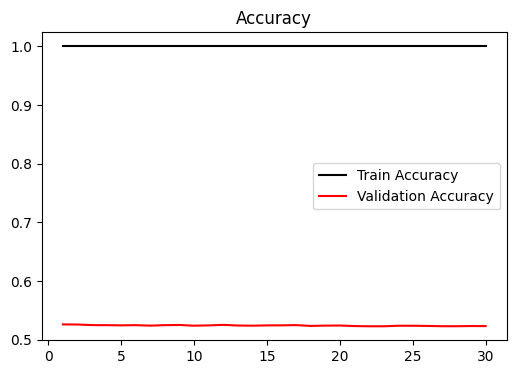

<Figure size 640x480 with 0 Axes>

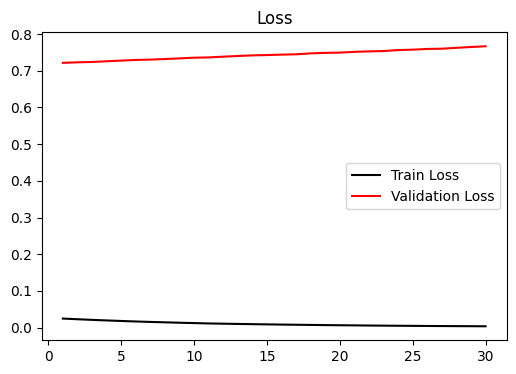

In [73]:
accuracy = Model_3.history['accuracy']
val_accuracy = Model_3.history['val_accuracy']

loss = Model_3.history["loss"]
val_loss = Model_3.history["val_loss"]

epochs = range(1, len(accuracy) + 1)

plt.figure(figsize=(6,4))
plt.plot(epochs, accuracy, color="black", linestyle="solid", label="Train Accuracy")
plt.plot(epochs, val_accuracy, color="red",linestyle="solid", label="Validation Accuracy")
plt.title("Accuracy")
plt.legend()
plt.figure()

plt.figure(figsize=(6,4))
plt.plot(epochs, loss, color="black", linestyle="solid", label="Train Loss")
plt.plot(epochs, val_loss, color="red", linestyle="solid", label="Validation Loss")
plt.title("Loss")
plt.legend()
plt.show()